<a href="https://colab.research.google.com/github/seiji0906/machine/blob/main/0116_1854.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# # 使うデータ
# import cv2
# from google.colab.patches import cv2_imshow

# path = '/content/drive/MyDrive/Colab Notebooks/相転移/'

# files = []

# files.append(path + "beta=0.06938775510204082_step=99.jpg")
# files.append(path + "beta=0.3989795918367347_step=99.jpg")
# files.append(path + "beta=0.6510204081632653_step=99.jpg")

# for num, file in enumerate(files):
#   img = cv2.imread(file)
#   img = cv2.resize(img,dsize=(180,180))
#   print("image" + str(num))
#   cv2_imshow(img)

In [52]:
import numpy as np
import cv2
import glob as glob
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

path = '/content/drive/MyDrive/Colab Notebooks'


folder = ['常磁性', '強磁性2']

X_image = []
Y_label = []

for label,class_name in enumerate(folder):
  files = glob.glob(path + "/" +  class_name + "/*.jpg")
  for file in files:
    img = cv2.imread(file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img,dsize=(180,180))
    X_image.append(img)
    Y_label.append(label)

X_image = np.array(X_image)
X_image = X_image.astype('float32')
X_image /= 255.0

Y_label = np.array(Y_label)
Y_label = np_utils.to_categorical(Y_label, len(folder))
Y_label[:5]



X_train,X_test,Y_train,Y_test = train_test_split(X_image,Y_label,test_size=0.2, shuffle=True)

print(len(X_train))
print(len(X_test))

3576
894


In [55]:
# 3576+894
print(1/0.05)
print(1/0.4)
print(1/0.5)


20.0
2.5
2.0


In [3]:
from tensorflow.python import metrics
from warnings import filters
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 1))

x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
outputs = layers.Dense(2, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 1)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 1)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                         

In [4]:
# 学習データで学習
model.fit(X_train, Y_train, epochs=10, batch_size=32)

#テストデータで精度確認
score = model.evaluate(X_test, Y_test, batch_size=32)

print(score)

Epoch 1/10
112/112 [==============================] - 244s 2s/step - loss: 0.6797 - accuracy: 0.5724
Epoch 2/10
112/112 [==============================] - 242s 2s/step - loss: 0.6678 - accuracy: 0.5663
Epoch 3/10
112/112 [==============================] - 240s 2s/step - loss: 0.4795 - accuracy: 0.7900
Epoch 4/10
112/112 [==============================] - 240s 2s/step - loss: 0.3014 - accuracy: 0.8753
Epoch 5/10
112/112 [==============================] - 242s 2s/step - loss: 0.2081 - accuracy: 0.9676
Epoch 6/10
112/112 [==============================] - 240s 2s/step - loss: 0.1003 - accuracy: 0.9841
Epoch 7/10
112/112 [==============================] - 240s 2s/step - loss: 0.2881 - accuracy: 0.9256
Epoch 8/10
112/112 [==============================] - 240s 2s/step - loss: 0.1372 - accuracy: 0.9645
Epoch 9/10
112/112 [==============================] - 242s 2s/step - loss: 0.1510 - accuracy: 0.9541
Epoch 10/10
28/28 [==============================] - 16s 579ms/step - loss: 2.1465e-04 - ac

In [43]:
path = '/content/drive/MyDrive/Colab Notebooks'


folder = ['相転移10']

X_image = []

for label,class_name in enumerate(folder):
  files = glob.glob(path + "/" +  class_name + "/*.jpg")
  for file in files:
    img = cv2.imread(file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img,dsize=(180,180))
    X_image.append(img)

X_image = np.array(X_image)
X_image = X_image.astype('float32')
X_image /= 255.0

print(len(X_image))

2000


In [44]:
history = model.predict(X_image)
# plt.plot(history)

63/63 [==============================] - 36s 569ms/step


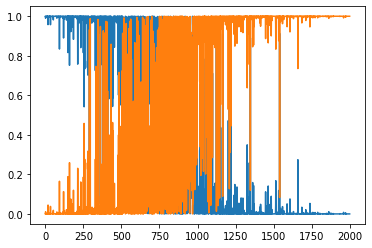

In [45]:
# print(history)
import matplotlib.pyplot as plt
from statistics import mean

# print(history)
plt.plot(history)

# print(history)

predict = []



# for i in range():


for i in range(len(history)):
  predict.append(history[i][1])

# print(predict)

# print(mean(predict[0:9]))

# result = []

# for i in range(50):
#   result.append(mean(predict[10*i:10*i+9]))



# print(result)



# betas=np.linspace(0.2, 0.6, 50).tolist()


# fig, ax = plt.subplots()
# ax.errorbar(betas, predict, capsize=4, marker='.')
# plt.show()

In [46]:
# history
print(len(history))

# predictを20要素ずつ平均を取る

2000


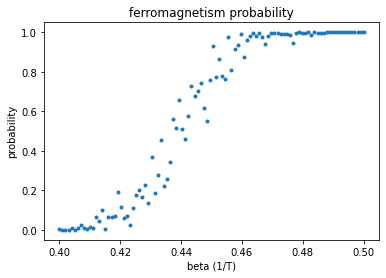

In [51]:
# for i in range(len(predict)):
#   print(predict[i])
from statistics import mean

result = []

p = 0

for i in range(100):
  for j in range(20):
    # print(i*20 + j)
    # mean(predict[])
    p += predict[i*20+j]
  result.append(p / 20)
  p = 0


# print(result)

# plt.plot(result)

betas=np.linspace(0.4, 0.5, 100).tolist()


fig, ax = plt.subplots()
plt.title("ferromagnetism probability")
plt.xlabel('beta (1/T)')
plt.ylabel('probability')
ax.errorbar(betas, result, capsize=4, marker='.', linestyle="")
# mpl.rcParams['lines.linestyle'] = ''
plt.show()


In [48]:
# import matplotlib.pyplot as plt
# from statistics import mean

# # print(history)
# # plt.plot(history)

# print(history)

# predict = []



# # for i in range():


# for i in range(len(history)):
#   predict.append(history[i][1])

# # print(predict)

# # print(mean(predict[0:9]))

# result = []

# for i in range(50):
#   result.append(mean(predict[10*i:10*i+9]))



# # print(result)



# betas=np.linspace(0.4, 0.5, 50).tolist()


# fig, ax = plt.subplots()
# ax.errorbar(betas, result, capsize=4, marker='.')
# plt.show()